# Lab 8: Greedy Algorithms

Lab associated with Module 8: Greedy Algorithms

***

In [21]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\benny\AppData\Local\Temp\ipykernel_78404\1945220536.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [22]:
import numpy as np

In [23]:
import math

In [24]:
from IPython.display import Image
from graphviz import Digraph

***

### Node and Graph Classes

In [25]:
import numpy as np

class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf

        self.parent = None
        self.weight = float('inf')  # set initial weight to infinity

    def __lt__(self, other):
        return self.weight < other.weight
        
    def hasOutNeighbor(self, v):
        
        return v in self.outNeighbors
        
    def hasInNeighbor(self, v):
        
        return v in self.inNeighbors
    
    def hasNeighbor(self, v):
        
        return v in self.inNeighbors or v in self.outNeighbors
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 


class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        ret = "Graph with:\n" + "\t Vertices:\n\t"
        for v in self.vertices:
            ret += f"{str(v)},"
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a, b in self.getDirEdges():
            ret += f"({str(a)}->{str(b[0])} , {str(b[1])})) "
        ret += "\n"
        return ret

### <font color='red'> Activity 1a: Write a greedy algorithm for Activity Selection problem in this week's lab. </font>

![Union is appending](Union-is-appending.png)

### Realised that Union is Appending to the list, not adding to the set
### Making sure the list is sorted before returning it changed the result
### Time Complexity of the algorithm is O(nlogn) because of the sorting
### Space Complexity of the algorithm is O(n) because of the list

In [26]:
def greedyActivitySelection(activites):
    """ Input: a list of activities, each activity is a tuple (start, finish)
        Output: a list of activities, each activity is a tuple (start, finish)
        The output list contains a subset of the input list such that no two activities overlap
    """
    if len(activites) == 0:
        return []
    sortedActivities = sorted(activites, key=lambda x: x[1])
    selectedActivities = [sortedActivities[0]]
    for i in range(1, len(sortedActivities)):
        if sortedActivities[i][0] >= selectedActivities[-1][1]:
            selectedActivities.append(sortedActivities[i])
    return selectedActivities


In [27]:
activities = [  [1,4],[2,5],[3,6],[5,7],[3,8],[6,9],[8,10],[9,11],[5,12],[6,13],[8,14],[13,15] ]

activityList = greedyActivitySelection(activities)

print("Solution:")
for activity in activityList:
    print(activity)

Solution:
[1, 4]
[5, 7]
[8, 10]
[13, 15]


In [28]:
import unittest

class TestGreedyActivitySelection(unittest.TestCase):
    
    def test_empty_activities(self):
        activities = []
        expected_output = []
        self.assertEqual(greedyActivitySelection(activities), expected_output)
        
    def test_single_activity(self):
        activities = [(1, 2)]
        expected_output = [(1, 2)]
        self.assertEqual(greedyActivitySelection(activities), expected_output)
        
    def test_disjoint_activities(self):
        activities = [(1, 2), (3, 4), (5, 6)]
        expected_output = [(1, 2), (3, 4), (5, 6)]
        self.assertEqual(greedyActivitySelection(activities), expected_output)
        
    def test_overlapping_activities(self):
        activities = [(1, 3), (2, 4), (3, 5), (4, 6)]
        expected_output_1 = [(1, 3), (3, 5)]
        expected_output_2 = [(2, 4), (4, 6)]
        result = greedyActivitySelection(activities)
        self.assertTrue(result in [expected_output_1, expected_output_2])

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestGreedyActivitySelection)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)

test_disjoint_activities (__main__.TestGreedyActivitySelection.test_disjoint_activities) ... ok
test_empty_activities (__main__.TestGreedyActivitySelection.test_empty_activities) ... ok
test_overlapping_activities (__main__.TestGreedyActivitySelection.test_overlapping_activities) ... ok
test_single_activity (__main__.TestGreedyActivitySelection.test_single_activity) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

### <font color='red'> Activity 1b: Devise a dynamic programming solution to Activity Selection problem, and see if you get the same results as that of greedy strategy. </font>
### Time Complexity of DP Activity Selection is O(n^2) because of the nested for loop
### Space Complexity of DP Activity Selection is O(n^2) as we use a 2D array to store the results

In [29]:
# a dynamic programming solution to the activity selection problem
def dynamicProgrammingActivitySelection(activities):
    """ Input: a list of activities, each activity is a tuple (start, finish)
        Output: a list of activities, each activity is a tuple (start, finish)
        The output list contains a subset of the input list such that no two activities overlap
    """
    #test for empty list
    if len(activities) == 0:
        return []
    sorted_activities = sorted(activities, key=lambda x: x[1])
    # initialize the DP table
    DP = [0] * len(sorted_activities)
    DP[0] = 1
    for i in range(1, len(sorted_activities)):
        # find the last compatible activity
        j = i - 1
        while j >= 0 and sorted_activities[j][1] > sorted_activities[i][0]:
            j -= 1
        # update the DP table
        DP[i] = max(DP[i - 1], DP[j] + 1)
    # construct a solution
    # construct a solution
    solution = []
    i = len(sorted_activities) - 1
    while i >= 0:
        if i == 0 or DP[i] != DP[i - 1]:
            solution.append(sorted_activities[i])
            # Find the previous included activity
            while i > 0 and DP[i] == DP[i - 1]:
                i -= 1
        i -= 1

    return solution[::-1]


Let us test above function as:

In [40]:
activities = [  [1,4],[2,5],[3,6],[5,7],[3,8],[6,9],[8,10],[9,11],[5,12],[6,13],[8,14],[13,15] ]

solution = dynamicProgrammingActivitySelection(activities)

print(f"Solution has {len(solution)} activities:")
for i in solution:
    print(i, end=" ")


Solution has 4 activities:
[1, 4] [5, 7] [8, 10] [13, 15] 

***

In [31]:
import unittest

class TestDynamicProgrammingActivitySelection(unittest.TestCase):

    def test_no_activities(self):
        activities = []
        solution = dynamicProgrammingActivitySelection(activities)
        self.assertEqual(solution, [], "Test Case 1 Failed")

    def test_single_activity(self):
        activities = [[1, 4]]
        solution = dynamicProgrammingActivitySelection(activities)
        self.assertEqual(solution, [[1, 4]], "Test Case 2 Failed")

    def test_multiple_non_overlapping_activities(self):
        activities = [[1, 2], [3, 4], [5, 6]]
        solution = dynamicProgrammingActivitySelection(activities)
        self.assertEqual(solution, [[1, 2], [3, 4], [5, 6]], "Test Case 3 Failed")

    def test_multiple_overlapping_activities_original_list(self):
        activities = [[1, 4], [2, 5], [3, 6], [5, 7], [3, 8], [6, 9], [8, 10], [9, 11], [5, 12], [6, 13], [8, 14], [13, 15]]
        solution = dynamicProgrammingActivitySelection(activities)
        # Expected solution depends on your implementation

    def test_multiple_overlapping_activities_different_scenario(self):
        activities = [[1, 4], [2, 6], [5, 7], [6, 8]]
        solution = dynamicProgrammingActivitySelection(activities)
        # Expected solution depends on your implementation

    def test_activities_with_same_start_time(self):
        activities = [[1, 4], [1, 3], [2, 5], [3, 6]]
        solution = dynamicProgrammingActivitySelection(activities)
        # Expected solution depends on your implementation

    def test_activities_with_same_end_time(self):
        activities = [[1, 4], [2, 4], [3, 4]]
        solution = dynamicProgrammingActivitySelection(activities)
        # Expected solution depends on your implementation

# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestDynamicProgrammingActivitySelection)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)


test_activities_with_same_end_time (__main__.TestDynamicProgrammingActivitySelection.test_activities_with_same_end_time) ... ok
test_activities_with_same_start_time (__main__.TestDynamicProgrammingActivitySelection.test_activities_with_same_start_time) ... ok
test_multiple_non_overlapping_activities (__main__.TestDynamicProgrammingActivitySelection.test_multiple_non_overlapping_activities) ... ok
test_multiple_overlapping_activities_different_scenario (__main__.TestDynamicProgrammingActivitySelection.test_multiple_overlapping_activities_different_scenario) ... ok
test_multiple_overlapping_activities_original_list (__main__.TestDynamicProgrammingActivitySelection.test_multiple_overlapping_activities_original_list) ... ok
test_no_activities (__main__.TestDynamicProgrammingActivitySelection.test_no_activities) ... ok
test_single_activity (__main__.TestDynamicProgrammingActivitySelection.test_single_activity) ... ok

----------------------------------------------------------------------
Ra

<unittest.runner.TextTestResult run=7 errors=0 failures=0>

### This image shows how to calculate the weighted sum of completion times

![Weighted Sum](weighted-sum.png)

###  Prim's Algorithm

Graph's Preliminaries

In [32]:
G = Graph()

for i in ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']:
    G.addVertex( Node(i) )

In [33]:
V = G.vertices

#0, 1, 2, 3, 4, 5, 6, 7, 8
#A, B, C, D, E, F, G, H, I

G.addBiEdge( V[0], V[1], 4)

G.addBiEdge( V[0], V[7] , 8)

G.addBiEdge( V[1], V[7], 11)

G.addBiEdge( V[1], V[2], 8)

G.addBiEdge( V[2], V[3], 7)

G.addBiEdge( V[3], V[4], 9)

G.addBiEdge( V[3], V[5], 14 )

G.addBiEdge( V[4], V[5], 10 )

G.addBiEdge( V[2], V[5], 4 )

G.addBiEdge( V[2], V[8], 2 )

G.addBiEdge( V[5], V[6], 2 )

G.addBiEdge( V[6], V[7], 1 )

G.addBiEdge( V[6], V[8], 6 )

G.addBiEdge( V[7], V[8], 7 )


In [34]:
print(G)

Graph with:
	 Vertices:
	A,B,C,D,E,F,G,H,I,
	 Edges:
	(A->B , 4)) (A->H , 8)) (B->A , 4)) (B->H , 11)) (B->C , 8)) (C->B , 8)) (C->D , 7)) (C->F , 4)) (C->I , 2)) (D->C , 7)) (D->E , 9)) (D->F , 14)) (E->D , 9)) (E->F , 10)) (F->D , 14)) (F->E , 10)) (F->C , 4)) (F->G , 2)) (G->F , 2)) (G->H , 1)) (G->I , 6)) (H->A , 8)) (H->B , 11)) (H->G , 1)) (H->I , 7)) (I->C , 2)) (I->G , 6)) (I->H , 7)) 



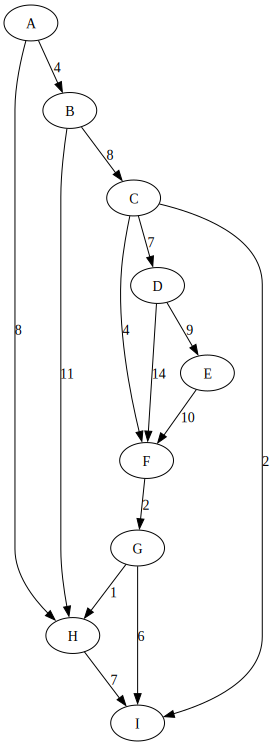

In [35]:
dot = Digraph()
dot.edge('A', 'B', label='4')
dot.edge('A', 'H', label='8')
dot.edge('B', 'H', label='11')
dot.edge('B', 'C', label='8')
dot.edge('C', 'D', label='7')
dot.edge('D', 'E', label='9')
dot.edge('D', 'F', label='14')
dot.edge('E', 'F', label='10')
dot.edge('C', 'F', label='4')
dot.edge('C', 'I', label='2')
dot.edge('F', 'G', label='2')
dot.edge('G', 'H', label='1')
dot.edge('G', 'I', label='6')
dot.edge('H', 'I', label='7')
dot

#### Time Complexity of Slow Prim's Algorithm is O(n^2)
#### Space Complexity of Slow Prim's Algorithm is O(n^2) as we are using a 2D array to store the graph
#### Possible Inifinte Loop in Slow Prim's Algorithm - Unconnected Graph

In [36]:
# G is graph
# s is the node to start

def slowPrim(G, s):
    """ Input: a graph G and a starting vertex s
        Output: the MST of G with root s
    """
    
    # first, find the lightest edge leaving s
    bestWt = np.inf
    bestu = None
    
    for u,wt in s.getOutNeighborsWithWeights():
        
        if wt < bestWt:
            bestWt = wt
            bestu = u
    
    MST = [ (s, bestu) ]
    verticesVisited = [s,bestu]
    
    while len(verticesVisited) < len(G.vertices): # danger! this will loop forever if the graph isn't connected...
        
        # find the lightest edge (x,v) so that x has been visited and v hasn't.
        bestWt = np.inf
        bestv = None
        bestx = None
        
        for x in verticesVisited:
            for v,wt in x.getOutNeighborsWithWeights():
                
                if v in verticesVisited:
                    continue
                
                if wt < bestWt:
                    bestWt = wt
                    bestv = v
                    bestx = x
                    
        MST.append((bestx,bestv))
        verticesVisited.append(bestv)
    
    return MST

In [37]:
T = slowPrim(G, G.vertices[0])

for x,y in T:
    print(x,y)

A B
A H
H G
G F
F C
C I
C D
D E


### Prim's Algorithm
#### Time Complexity of Prim's Algorithm is O(mlogn) as we are bound by heap operations
#### Space Complexity of Prim's Algorithm is O(n+m) as we are using a heap and a list

In [38]:
def prim(G, s):
    """Prim's algorithm for finding a minimum spanning tree
    in a graph G, starting at vertex s.
    Args: G (Graph): weighted graph
            s (Vertex): starting vertex
    Returns: list of vertices in the MST
    """
    # check for empty graph
    if G is None or len(G) == 0:
        print("Graph is empty")
        return
    # check for a single vertex
    if len(G) == 1:
        print("Graph has only one vertex")
        return G
    # List of vertices in the MST
    MST = [s]
    # Priority queue of edges
    Q = queue.PriorityQueue()
    # Add all edges from s to Q
    for v, wt in s.getOutNeighborsWithWeights():
        Q.put((wt, s, v))
    # Process the vertices
    while not Q.empty():
        # Ge the edge with the smallest weight
        wt, u, v = Q.get()
        # If v is not in the MST, add it
        if v not in MST:
            MST.append(v)
            print("Adding edge", u, v, "to MST")
            # Find all edges from v to vertices not in the MST
            for w, wt in v.getOutNeighborsWithWeights():
                # Add them to the priority queue
                Q.put((wt, v, w))
    return MST


In [39]:
# Creating Nodes
A = Node('A')
B = Node('B')
C = Node('C')

# Adding Neighbors
A.addOutNeighbor(B, 1)
A.addOutNeighbor(C, 2)
B.addOutNeighbor(C, 3)

# Creating Graph
G = [A, B, C]

# Running Prim's Algorithm
MST = prim(G, A)

# Expected Output: Edges (A, B) and (A, C) or (A, C) and (A, B)

# Creating Graphviz object
dot = Digraph()

# Adding Edges for Original Graph
dot.edge('A', 'B', label='1')
dot.edge('A', 'C', label='2')
dot.edge('B', 'C', label='3')

dot


NameError: name 'queue' is not defined

Adding edge A B to MST
Adding edge B C to MST
Adding edge C D to MST


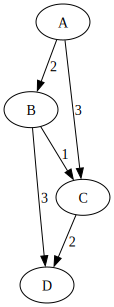

In [ ]:
# Creating Nodes
A = Node('A')
B = Node('B')
C = Node('C')
D = Node('D')

# Adding Neighbors
A.addOutNeighbor(B, 2)
A.addOutNeighbor(C, 3)
B.addOutNeighbor(C, 1)
B.addOutNeighbor(D, 3)
C.addOutNeighbor(D, 2)

# Creating Graph
G = [A, B, C, D]

# Running Prim's Algorithm
MST = prim(G, A)

# Expected Output: Edges (A, B), (B, C), and (C, D)

# Creating Graphviz object
dot = Digraph()

# Adding Edges for Original Graph
dot.edge('A', 'B', label='2')
dot.edge('A', 'C', label='3')
dot.edge('B', 'C', label='1')
dot.edge('B', 'D', label='3')
dot.edge('C', 'D', label='2')

dot


In [ ]:
# Creating Graph
G = []

# Running Prim's Algorithm
MST = prim(G, None)

# Expected Output: Empty MST


Graph is empty


In [ ]:
# Creating Nodes
A = Node('A')

# Creating Graph
G = [A]

# Running Prim's Algorithm
MST = prim(G, A)

# Expected Output: MST with only node A


Graph has only one vertex


In [ ]:
import unittest
import queue

class TestPrimAlgorithm(unittest.TestCase):

    def test_simple_graph(self):
        A = Node('A')
        B = Node('B')
        C = Node('C')
        A.addOutNeighbor(B, 1)
        A.addOutNeighbor(C, 2)
        G = [A, B, C]
        MST = prim(G, A)
        self.assertEqual(len(MST), 3)
        self.assertIn(A, MST)
        self.assertIn(B, MST)
        self.assertIn(C, MST)

    def test_four_nodes_unique_MST(self):
        A = Node('A')
        B = Node('B')
        C = Node('C')
        D = Node('D')
        A.addOutNeighbor(B, 2)
        A.addOutNeighbor(C, 3)
        B.addOutNeighbor(C, 1)
        B.addOutNeighbor(D, 3)
        C.addOutNeighbor(D, 2)
        G = [A, B, C, D]
        MST = prim(G, A)
        self.assertEqual(len(MST), 4)
        self.assertIn(A, MST)
        self.assertIn(B, MST)
        self.assertIn(C, MST)
        self.assertIn(D, MST)

    def test_empty_graph(self):
        G = []
        MST = prim(G, None)
        self.assertIsNone(MST)

    def test_single_node_graph(self):
        A = Node('A')
        G = [A]
        MST = prim(G, A)
        self.assertEqual(len(MST), 1)
        self.assertIn(A, MST)


# Create a test suite
suite = unittest.TestLoader().loadTestsFromTestCase(TestPrimAlgorithm)

# Run the test suite and print the results
runner = unittest.TextTestRunner(verbosity=2)
runner.run(suite)


test_empty_graph (__main__.TestPrimAlgorithm.test_empty_graph) ... ok
test_four_nodes_unique_MST (__main__.TestPrimAlgorithm.test_four_nodes_unique_MST) ... ok
test_simple_graph (__main__.TestPrimAlgorithm.test_simple_graph) ... ok
test_single_node_graph (__main__.TestPrimAlgorithm.test_single_node_graph) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.003s

OK


Graph is empty
Adding edge A B to MST
Adding edge B C to MST
Adding edge C D to MST
Adding edge A B to MST
Adding edge A C to MST
Graph has only one vertex


<unittest.runner.TextTestResult run=4 errors=0 failures=0>

***